<h1 style="text-align:center;">Лабораторная работа №1 по курсу "Машинное обучение"</h1>
<p style="text-align:right; font-size:125%"><i>Выполнил студент группы М8О-307Б Лопатин Александр</i></p>

# Постановка задачи

Необходимо сформировать два набора данных для приложений машинного
обучения. Первый датасет должен представлять из себя табличный набор данных для
задачи классификации. Второй датасет должен быть отличен от первого, и может
представлять из себя набор изображений, корпус документов, другой табличный
датасет или датасет из соревнования Kaggle, предназначенный для решения
интересующей вас задачи машинного обучения. Необходимо провести анализ обоих
наборов данных, поставить решаемую вами задачу, определить признаки необходимые
для решения задачи, в случае необходимости заняться генерацией новых признаков,
устранением проблем в данных, визуализировать распределение и зависимость
целевого признака от выбранных признаков. В отчете описать все проблемы, с
которыми вы столкнулись и выбранные подходы к их решению.

# Описание первого датасета

 Данный датасет отображает статистику самоубийств во всем мире по всему социально-экономическому спектру (возраст, пол, ВВП на душу населения, индекс человеческого развития и даже поколение (X, Y, Z))

# Решаемая задача


По заданным признакам страны (год, количество населения, ВВП на душу населения, количество самоубийств на 100 тыс. населения) определить, является ли эта страна развивающейся или развитой. Для определения этого критерия можно взять сравнение индекса человеческого развития с его медианным значением.

# Загрузка данных

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
directory = "datasets/"
def loadDataSet(name):
    csv_path = os.path.join(directory, name)   
    return pd.read_csv(csv_path)

In [5]:
firstDS = loadDataSet("first.csv")
firstDS.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
firstDS.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

# Описание данных

Во-первых, как можно заметить, не во всех данных присутствует индекс человеческого развития (количество 8364, а должно быть 27820). Во-вторых, столбец country-year нужен для группировки данных по отдельной стране в конкретный год.

In [260]:
firstDS.describe(include="all")

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,8364.000000,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,2321,NaN,2321,NaN,6
top,Iceland,NaN,female,55-74 years,NaN,NaN,NaN,Denmark1999,NaN,"612,939,685,081",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,NaN,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,0.776601,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,0.093367,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,0.483000,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,0.713000,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,0.779000,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,0.855000,NaN,24874.000000,NaN


In [8]:
firstDS["generation"].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000156571B1580>,
      dtype=object)

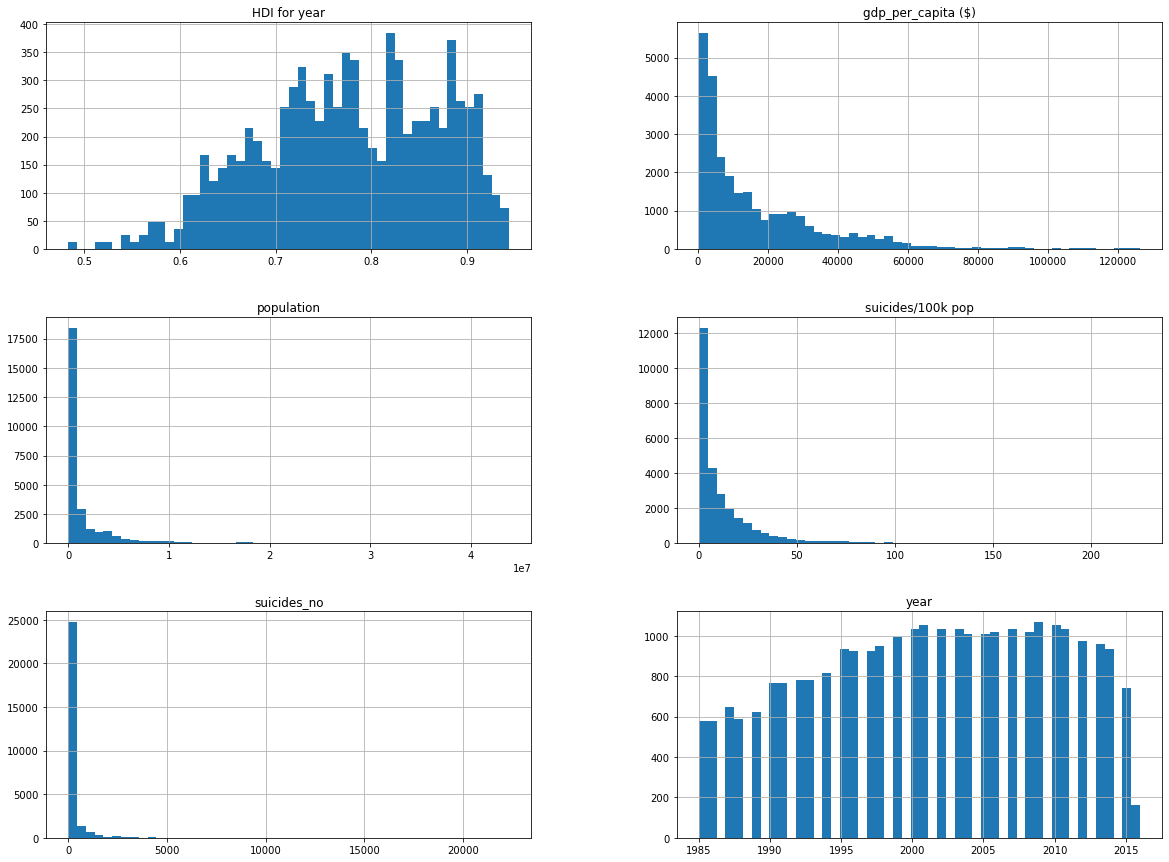

In [26]:
firstDS.hist(bins=50,figsize=(20,15))


# Визуализация и анализ данных

Посмотрим различные зависимости социально-экономических признаков для разных поколений и полов:

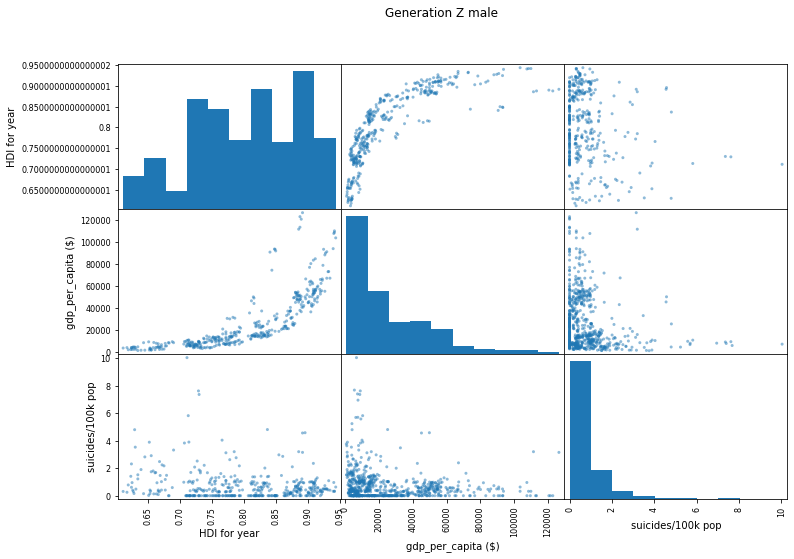

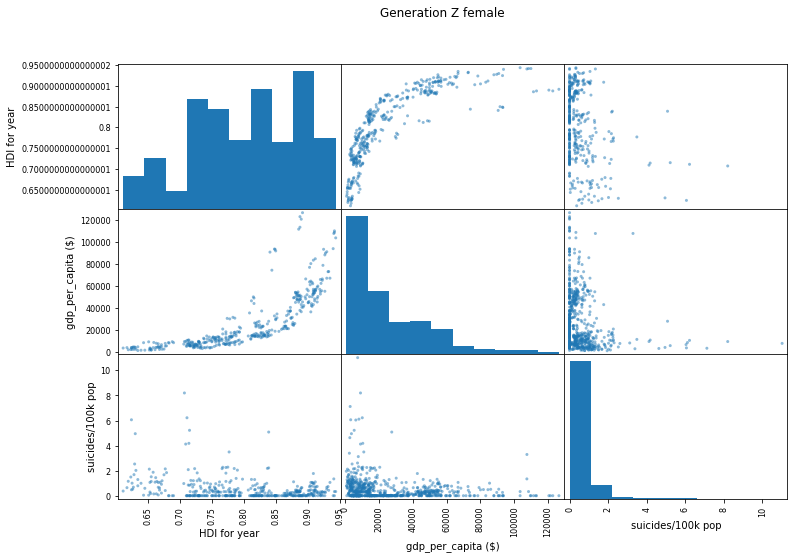

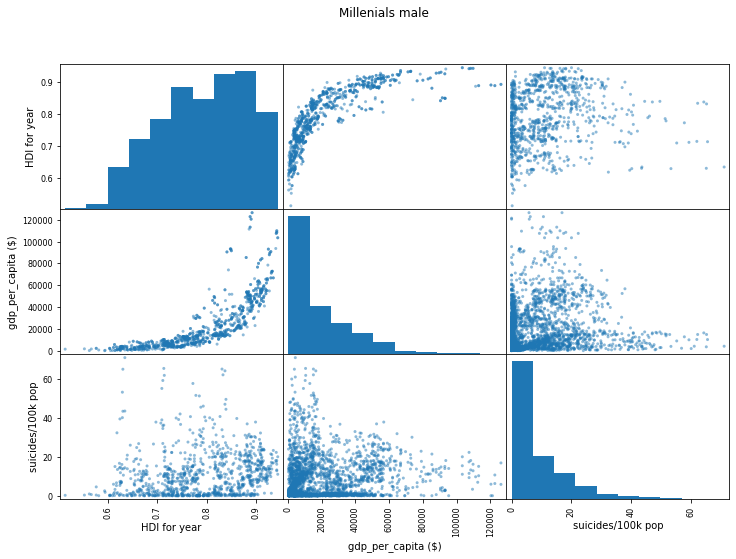

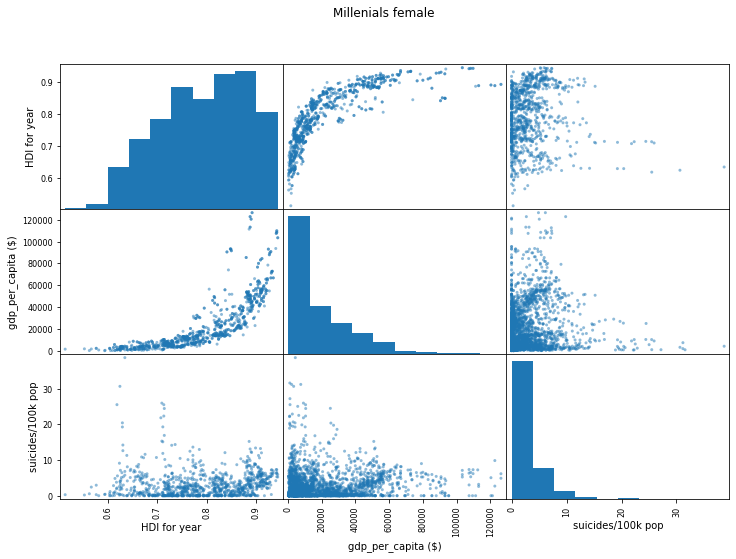

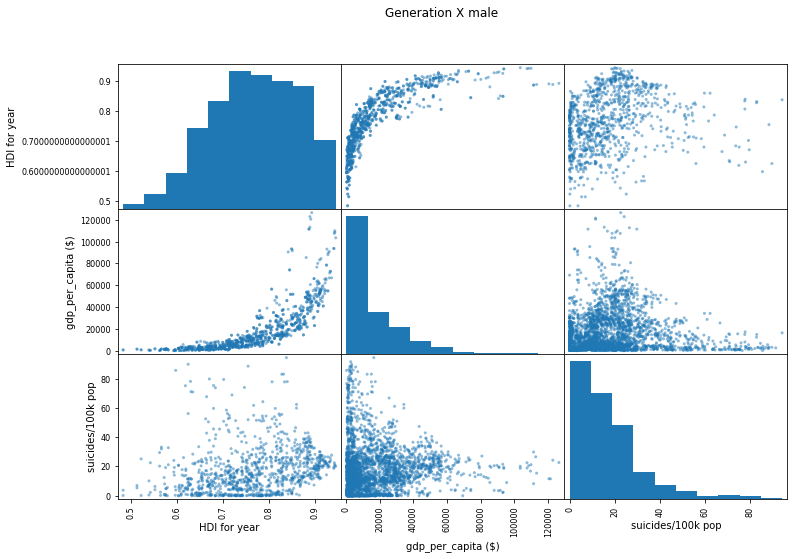

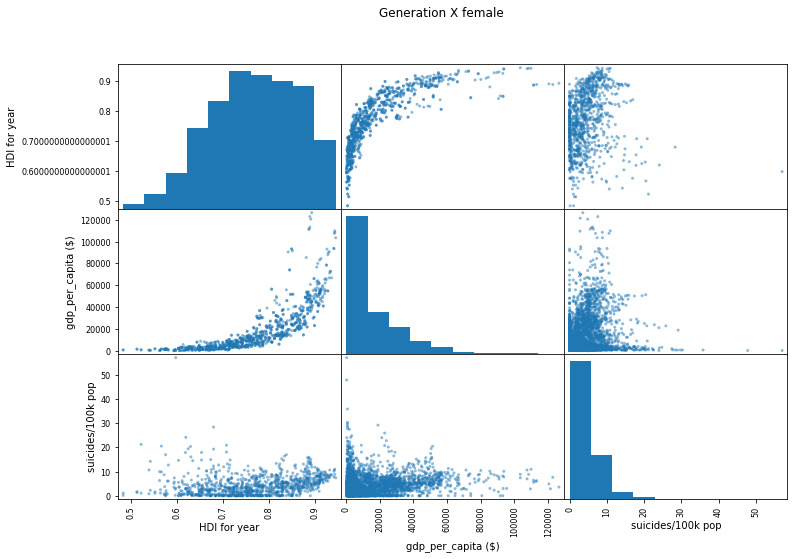

In [41]:
from pandas.plotting import scatter_matrix
attributes = ["HDI for year", "gdp_per_capita ($)", "suicides/100k pop"] 
parameters = ["Generation Z", "Millenials", "Generation X"] 
np.set_printoptions(2500)
for i in parameters:
    scatter_matrix(firstDS[attributes].where(np.logical_and(firstDS["generation"] == i, firstDS["sex"] == "male")), figsize=(12, 8))
    plt.suptitle(i + " male")
    scatter_matrix(firstDS[attributes].where(np.logical_and(firstDS["generation"] == i, firstDS["sex"] == "female")), figsize=(12, 8))
    plt.suptitle(i + " female")

Для разных поколений и полов графики зависимости примерно одинаковы.

In [43]:
corr_matrix = firstDS.corr()
corr_matrix["suicides/100k pop"].sort_values(ascending=False)

suicides/100k pop     1.000000
suicides_no           0.306604
HDI for year          0.074279
population            0.008285
gdp_per_capita ($)    0.001785
year                 -0.039037
Name: suicides/100k pop, dtype: float64

In [44]:
corr_matrix["HDI for year"].sort_values(ascending=False)

HDI for year          1.000000
gdp_per_capita ($)    0.771228
year                  0.366786
suicides_no           0.151399
population            0.102943
suicides/100k pop     0.074279
Name: HDI for year, dtype: float64

На индекс человеческого развития страны особенно влияют признаки ВВП на душу населения, год, количество самоубийств и количество населения.

# Feature Engeenering

Также хотелось бы иметь общую для всех категорий населения статистику самоубийств для каждой страны в конкретный год:

In [374]:
total = firstDS.groupby(["country-year"]).agg({"country-year": "first", "suicides_no": "sum","population": "sum"})
total["suicides_no"] = 100000 * total["suicides_no"]/total["population"]
total.rename(columns={'suicides_no':'total suicides/100k pop'}, inplace=True)
del total["population"]
firstDSext = firstDS.join(total.set_index('country-year'), on='country-year')
firstDSext['total suicides/100k pop'].describe()

count    27820.000000
mean        11.737331
std          8.920664
min          0.000000
25%          4.998151
50%         10.083301
75%         16.146591
max         51.019758
Name: total suicides/100k pop, dtype: float64

In [336]:
corr_matrix = firstDSext.corr()
corr_matrix["total suicides/100k pop"].sort_values(ascending=False)

total suicides/100k pop    1.000000
suicides/100k pop          0.502553
suicides_no                0.235801
HDI for year               0.216660
population                 0.074639
gdp_per_capita ($)         0.060437
year                      -0.016007
Name: total suicides/100k pop, dtype: float64

На общее количество самоубийств на 100 тыс. населения влияет, очевидно, количество самоубийств на 100 тыс. в конкретной категории населения, общее количество самоубийств в стране, индекс человеческого развития, количество населения и ВВП на душу населения.

# Работа с проблемами данными

Заполним пропуски для столбца "HDI for year":

In [6]:
median = firstDS["HDI for year"].median() 
firstDSext = firstDS
firstDSext["HDI for year"] = firstDS["HDI for year"].fillna(median)

In [7]:
firstDSext.describe(include="all")

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,27820.000000,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,2321,NaN,2321,NaN,6
top,Netherlands,NaN,female,55-74 years,NaN,NaN,NaN,Guyana2006,NaN,"725,185,185",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,NaN,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,0.778279,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,0.051204,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,0.483000,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,0.779000,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,0.779000,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,0.779000,NaN,24874.000000,NaN


# Описание второго датасета

В этом датасете который сравнивается различная информация о бронировании между двумя отелями: городской гостиницей и курортной гостиницей.

# Решаемая задача

По заданным признакам (отель, количество дней до въезда, количество взрослых, предыдущие отмены определить, будет ли данная бронь отменена.

# Загрузка данных

In [8]:
secondDS = loadDataSet("second.csv")
secondDS.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Описание данных

Столбец hotel обозначает тип отеля (городской/курортный), is_canceled - было ли отменено бронирование, lead_time - время между бронированием и приездом, adults - количество взрослых.

In [9]:
secondDS.describe(include="all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


# Работа с проблемами данными

Переведем основные категориальные признаки в числовые. Категориальными признаками являются: столбцы  hotel и arrival_date_month.

In [13]:
secondDS['hotel'] = secondDS['hotel'].astype('category')
secondDS['arrival_date_month'] = secondDS['arrival_date_month'].astype('category')
cat_columns = secondDS.select_dtypes(['category']).columns
secondDS[cat_columns] = secondDS[cat_columns].apply(lambda x: x.cat.codes)
secondDS.describe(include="all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,0.335539,0.370416,104.011416,2016.156554,5.490544,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,0.472181,0.482918,106.863097,0.707476,3.535075,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,0.000000,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,18.000000,2016.000000,2.000000,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,0.000000,0.000000,69.000000,2016.000000,6.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,1.000000,1.000000,160.000000,2017.000000,8.000000,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


# Визуализация и анализ данных

По графику видно, что количество взрослых не зависит от месяца и примерно постоянно. Также можно заметить, что на апрель и май бронируют позже, чем на другие месяцы.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C724EE1C0>,
      dtype=object)

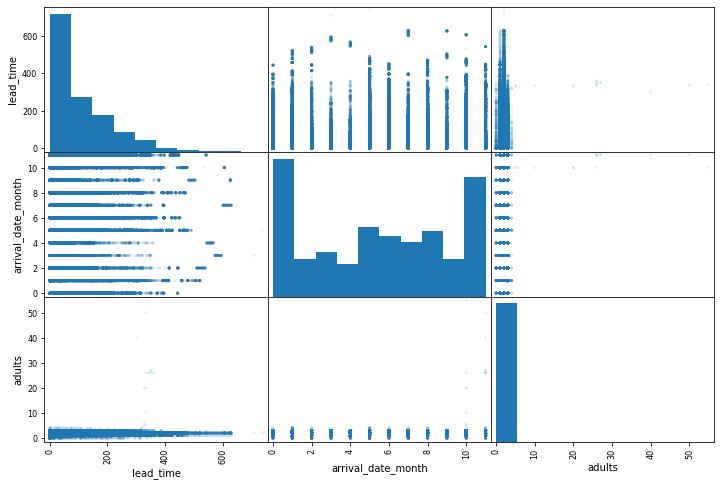

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["lead_time", "arrival_date_month","adults"] 
scatter_matrix(secondDS[attributes], figsize=(12, 8), alpha = 0.1)


Корреляция признака отмены бронирования от других признаков:

In [22]:
corr_matrix = secondDS.corr()
corr_matrix["is_canceled"].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005048
arrival_date_month               -0.001491
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
company                          -0.020642
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
agent                            -0.083114
is_repeated_guest                -0.084793
hotel                            -0.136531
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

Как и ожидалось, на отмены бронирования влияет количество дней от даты брони до даты въезда и предыдущие отмены.

# Вывод

В этой лабораторной работе я познакомился со средствами анализа набора данных для машинного обучения, поставил задачи для каждого датасета, научился генерировать новые признаки и устранять проблемы в данных.